In [9]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np

In [56]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)



In [10]:
a = pd.read_csv('./Roma/reviews.csv')
a

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional..."
...,...,...,...,...,...,...
1229192,706364021561816308,711373516618902584,2022-09-08,348540159,Aurelie,"Endroit très calme, beau et un accueil très ch..."
1229193,706368632054192826,711400577972053122,2022-09-08,36852987,Philipp,Die Kommunikation mit Danilo verlief reibungsl...
1229194,706549325055926003,712081657753454508,2022-09-09,261132482,Luis,Todo perfecto! Luca es muy amable y buen anfit...
1229195,706549325055926003,713601963424948343,2022-09-11,392955273,Luigi,Mi sono trovato benissimo sin da subito nell'a...


In [11]:
roma_list = pd.read_csv('./Roma/listings.csv')
roma_list

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,Tranquillità immersa nel verde con due laghi m...,https://a0.muscache.com/pictures/68d7eb8c-e5b6...,68534156,...,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,NaN,https://a0.muscache.com/pictures/2848355/49282...,535822,...,4.53,4.40,4.20,NaN,t,1,1,0,0,1.64
3,2903,https://www.airbnb.com/rooms/2903,20220911230914,2022-09-12,city scrape,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,NaN,https://a0.muscache.com/pictures/6315103/3f4d3...,3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.33
4,104339,https://www.airbnb.com/rooms/104339,20220911230914,2022-09-12,previous scrape,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...","Il quartiere ""San Paolo"" è parte integrante de...",https://a0.muscache.com/pictures/739258/4146f6...,543054,...,5.00,4.83,4.83,NaN,f,3,1,2,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,https://www.airbnb.com/rooms/28042301,20220911230914,2022-09-12,city scrape,Bright apartment close to the seaside.,Apartment on the 2nd floor with a large and ve...,Very close to food shops and restaurants and o...,https://a0.muscache.com/pictures/5f242f57-b704...,211821938,...,4.88,4.82,4.65,NaN,t,1,1,0,0,0.35
24778,41256298,https://www.airbnb.com/rooms/41256298,20220911230914,2022-09-12,city scrape,Nativo Suite Da Vinci 25,Nativo Lodge è una realtà che si occupa di aff...,"Located in Rome, within 19 km of PalaLottomati...",https://a0.muscache.com/pictures/0ecdfded-2ff1...,252978577,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.04
24779,15476977,https://www.airbnb.com/rooms/15476977,20220911230914,2022-09-12,city scrape,"Deluxe Doble Room,Bathtub",The room is located within an apartment on the...,"Located in Fiumicino, within the complex of Pa...",https://a0.muscache.com/pictures/fb1b5ce1-9e35...,95809238,...,NaN,NaN,NaN,NaN,t,8,2,6,0,NaN
24780,42446790,https://www.airbnb.com/rooms/42446790,20220911230914,2022-09-12,city scrape,Night in the wood,Immersi nella natura e a contatto con gli anim...,NaN,https://a0.muscache.com/pictures/b1c79762-f024...,2214620,...,5.00,4.33,4.67,NaN,t,2,0,2,0,0.12


In [12]:
roma_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [13]:
roma_list[["price"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24782 entries, 0 to 24781
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   24782 non-null  object
dtypes: object(1)
memory usage: 193.7+ KB


In [14]:
roma_list["reviews_per_month"].unique()

array([3.220e+00, 7.000e-02, 1.640e+00, 3.300e-01, 5.000e-02, 1.500e-01,
       1.140e+00, 3.000e-01, 2.000e-02, 4.000e-01, 1.310e+00, 3.100e-01,
       4.000e-02, 6.700e-01, 3.600e-01, 7.700e-01, 4.490e+00, 3.400e-01,
       4.900e-01, 4.300e-01, 6.000e-01, 3.170e+00, 1.000e-01, 1.520e+00,
             nan, 2.170e+00, 8.000e-02, 4.700e-01, 1.040e+00, 3.000e-02,
       1.870e+00, 2.250e+00, 2.300e-01, 1.920e+00, 2.700e-01, 1.110e+00,
       1.400e-01, 1.010e+00, 1.600e-01, 9.000e-02, 2.500e+00, 4.400e-01,
       6.400e-01, 9.100e-01, 2.750e+00, 1.330e+00, 1.900e-01, 7.000e-01,
       1.610e+00, 1.720e+00, 3.750e+00, 2.800e-01, 2.200e-01, 1.280e+00,
       4.800e-01, 9.200e-01, 1.590e+00, 2.360e+00, 6.000e-02, 1.660e+00,
       1.840e+00, 3.800e-01, 2.500e-01, 1.290e+00, 1.760e+00, 3.500e-01,
       2.000e-01, 1.560e+00, 8.100e-01, 5.000e+00, 1.400e+00, 1.060e+00,
       1.380e+00, 1.000e-02, 2.910e+00, 2.340e+00, 2.140e+00, 2.000e+00,
       6.600e-01, 1.200e+00, 1.440e+00, 8.900e-01, 

In [15]:
pd.set_option('display.max_columns', 100)
roma_cleaned = roma_list[["id","listing_url","name","description","host_id","host_name","host_response_time","host_response_rate","host_is_superhost","latitude","longitude","property_type","room_type","accommodates","bathrooms_text","bedrooms","beds","amenities","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","instant_bookable","reviews_per_month"]]
roma_cleaned

,id,listing_url,name,description,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,68534156,Cristina,within a few hours,100%,t,41.78984,12.60899,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,f,3.22
1,2737,https://www.airbnb.com/rooms/2737,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,3047,Elif,within a few hours,99%,f,41.87136,12.48215,Private room,Private room,1,1.5 baths,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,f,0.07
2,103870,https://www.airbnb.com/rooms/103870,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,535822,Fabrizio,within an hour,100%,f,41.89711,12.50423,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,t,1.64
3,2903,https://www.airbnb.com/rooms/2903,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,3280,Andrea,within a day,56%,f,41.88824,12.46953,Private room in bed and breakfast,Private room,4,1 bath,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating...",$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,f,0.33
4,104339,https://www.airbnb.com/rooms/104339,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...",543054,Giuseppe,NaN,NaN,f,41.85585,12.48361,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,f,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,https://www.airbnb.com/rooms/28042301,Bright apartment close to the seaside.,Apartment on the 2nd floor with a large and ve...,211821938,Naiche,NaN,NaN,f,41.64897,12.43349,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dish...",$55.00,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,t,0.35
24778,41256298,https://www.airbnb.com/rooms/41256298,Nativo Suite Da Vinci 25,Nativo Lodge è una realtà che si occupa di aff...,252978577,Ludovica,within an hour,58%,f,41.79978,12.30112,Entire rental unit,Entire home/apt,4,2.5 baths,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditi...",$120.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,0.04
24779,15476977,https://www.airbnb.com/rooms/15476977,"Deluxe Doble Room,Bathtub",The room is located within an apartment on the...,95809238,Ileana,within a day,50%,f,41.79590,12.29634,Private room in rental unit,Private room,3,1 private bath,1.0,2.0,"[""Dedicated workspace"", ""Air conditioning"", ""S...",$165.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
24780,42446790,https://www.airbnb.com/rooms/42446790,Night in the wood,Immersi nella natura e a contatto con gli anim...,2214620,Marco,within an hour,100%,f,42.10042,12.38471,Private room in guest suite,Private room,3,4 baths,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditi...",$50.00,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,t,0.12


In [21]:
roma_cleaned['price'] = roma_cleaned['price'].str.replace(r'\D', '').astype(int)/100 # price kolonunu int yapıp $işaretini ayırdım

AttributeError: Can only use .str accessor with string values!

In [22]:
roma_cleaned

,id,listing_url,name,description,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,68534156,Cristina,within a few hours,100%,t,41.78984,12.60899,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",45.0,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,f,3.22
1,2737,https://www.airbnb.com/rooms/2737,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,3047,Elif,within a few hours,99%,f,41.87136,12.48215,Private room,Private room,1,1.5 baths,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",50.0,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,f,0.07
2,103870,https://www.airbnb.com/rooms/103870,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,535822,Fabrizio,within an hour,100%,f,41.89711,12.50423,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",78.0,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,t,1.64
3,2903,https://www.airbnb.com/rooms/2903,Stay a night in Calisto6 B&B Rome,<b>The space</b><br />Calisto6 B&B is an Itali...,3280,Andrea,within a day,56%,f,41.88824,12.46953,Private room in bed and breakfast,Private room,4,1 bath,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating...",164.0,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,f,0.33
4,104339,https://www.airbnb.com/rooms/104339,Colorful apartment close MetroB,"Delightful, bright and colorful apartment for ...",543054,Giuseppe,NaN,NaN,f,41.85585,12.48361,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",80.0,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,f,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,https://www.airbnb.com/rooms/28042301,Bright apartment close to the seaside.,Apartment on the 2nd floor with a large and ve...,211821938,Naiche,NaN,NaN,f,41.64897,12.43349,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dish...",55.0,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,t,0.35
24778,41256298,https://www.airbnb.com/rooms/41256298,Nativo Suite Da Vinci 25,Nativo Lodge è una realtà che si occupa di aff...,252978577,Ludovica,within an hour,58%,f,41.79978,12.30112,Entire rental unit,Entire home/apt,4,2.5 baths,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditi...",120.0,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,0.04
24779,15476977,https://www.airbnb.com/rooms/15476977,"Deluxe Doble Room,Bathtub",The room is located within an apartment on the...,95809238,Ileana,within a day,50%,f,41.79590,12.29634,Private room in rental unit,Private room,3,1 private bath,1.0,2.0,"[""Dedicated workspace"", ""Air conditioning"", ""S...",165.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
24780,42446790,https://www.airbnb.com/rooms/42446790,Night in the wood,Immersi nella natura e a contatto con gli anim...,2214620,Marco,within an hour,100%,f,42.10042,12.38471,Private room in guest suite,Private room,3,4 baths,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditi...",50.0,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,t,0.12


In [18]:
roma_cleaned.sort_values(by="price",ascending=False)

,id,listing_url,name,description,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
8747,21071976,https://www.airbnb.com/rooms/21071976,"Studio Flat next to the""Re di Roma"" subway sta...","* Monolocale di fronte la metro ""Re di Roma""<b...",151858883,Priscilla & Lorenzo,within an hour,100%,f,41.882880,12.514560,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Air conditioning"", ""Heating"", ""Paid parking ...",91000.0,122,4.76,4.89,4.96,4.97,4.98,4.83,4.79,t,2.02
19450,52212867,https://www.airbnb.com/rooms/52212867,appartamento,Rilassati e ricaricati in quest'oasi di quiete...,274430093,Valerio,NaN,NaN,f,41.834650,12.357050,Entire condo,Entire home/apt,4,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""L...",90963.0,1,3.00,3.00,4.00,5.00,5.00,4.00,3.00,t,0.09
17630,47268454,https://www.airbnb.com/rooms/47268454,Loft Piazza del Popolo Via del Corso Roma,Very Nice Loft completely new and refurbished ...,381696345,Daniele,NaN,NaN,f,41.908720,12.475350,Entire loft,Entire home/apt,4,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Microwave"", ""...",50000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
24135,700373426294032745,https://www.airbnb.com/rooms/700373426294032745,Romantic apartment in Roma with balcony/terrace,NaN,270230010,Iris - BELVILLA,within an hour,100%,f,41.876351,12.466744,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Private entrance"", ""A...",21000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
23977,698197219324627165,https://www.airbnb.com/rooms/698197219324627165,Nice apartment in Roma near San Giovanni Train...,A comfy apartment in the center of Rome. Ideal...,270230010,Iris - BELVILLA,within an hour,100%,f,41.885571,12.512228,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Dedicated workspace"", ""Private entrance"", ""A...",21000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16228,42534857,https://www.airbnb.com/rooms/42534857,A.Roma Lifestyle Hotel,NaN,309508008,A.Roma Lifestyle Hotel,NaN,NaN,NaN,41.874880,12.432770,Room in hotel,Hotel room,4,NaN,NaN,NaN,"[""Complimentary self parking"", ""Heating"", ""Lug...",0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
16416,42430406,https://www.airbnb.com/rooms/42430406,Hotel Indipendenza,NaN,308954965,Hotel Indipendenza,NaN,NaN,NaN,41.903380,12.502500,Room in hotel,Hotel room,4,NaN,NaN,NaN,"[""Air conditioning"", ""Luggage dropoff allowed""...",0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
16390,43036135,https://www.airbnb.com/rooms/43036135,Hotel Principessa Isabella,NaN,312575420,Lesego,NaN,NaN,NaN,41.909640,12.492100,Room in boutique hotel,Hotel room,0,NaN,NaN,NaN,"[""Air conditioning"", ""Luggage dropoff allowed""...",0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
17626,46095725,https://www.airbnb.com/rooms/46095725,Hotel Modigliani,NaN,373583263,Francesco,NaN,NaN,NaN,41.905564,12.485924,Room in boutique hotel,Hotel room,0,NaN,NaN,NaN,"[""Long term stays allowed""]",0.0,1,3.00,5.00,5.00,3.00,3.00,5.00,2.00,f,0.15


In [32]:
roma_cleaned[roma_cleaned["number_of_reviews"]>100]

,id,listing_url,name,description,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sent...,68534156,Cristina,within a few hours,100%,t,41.789840,12.608990,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",45.0,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,f,3.22
2,103870,https://www.airbnb.com/rooms/103870,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apa...,535822,Fabrizio,within an hour,100%,f,41.897110,12.504230,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",78.0,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,t,1.64
6,11834,https://www.airbnb.com/rooms/11834,"Roma ""Charming Boschetto House""",The apartment is located on the ground floor o...,44552,Serena,within a few hours,100%,t,41.896500,12.492110,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Air conditioning"", ""Children\u2019s dinnerwa...",100.0,158,4.77,4.77,4.88,4.97,4.92,4.98,4.70,f,1.14
10,108039,https://www.airbnb.com/rooms/108039,Sweet terrace by Vatican Musuem New wifi 100Mbs!,Very Cute apartment 5 minutes walk from the va...,355604,Alessandro & Silvia,within an hour,100%,t,41.904280,12.445100,Entire rental unit,Entire home/apt,3,1 bath,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Paid parking ...",75.0,128,4.79,4.80,4.82,4.89,4.95,4.68,4.67,t,1.31
17,113590,https://www.airbnb.com/rooms/113590,SMALL STUDIO FLAT Btw Termini & Colosseum!,***In my B&B you'll find a very nice studio f...,577650,Antonella,within an hour,100%,f,41.894160,12.509580,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Luggage dropoff allowed"", ""37\"" TV"", ""Coffee...",49.0,617,4.58,4.74,4.72,4.84,4.81,4.41,4.55,f,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,21881688,https://www.airbnb.com/rooms/21881688,Giramondo luxe,Giramondo luxe è un incantevole attico situato...,97145158,Monica,within an hour,100%,f,41.798370,12.290520,Entire loft,Entire home/apt,8,2 baths,2.0,8.0,"[""Private entrance"", ""Air conditioning"", ""Heat...",135.0,166,4.70,4.78,4.86,4.66,4.75,4.64,4.70,t,2.92
24659,539119,https://www.airbnb.com/rooms/539119,AIRPORT APT. ROOF GARDEN SHORT STAY,Staying in this apartment is one of the smarte...,2648705,Airport Roof Garden,within a few hours,100%,t,41.798560,12.296420,Entire condo,Entire home/apt,4,1 bath,1.0,2.0,"[""Heating"", ""Ethernet connection"", ""Microwave""...",79.0,259,4.75,4.83,4.81,4.90,4.90,4.73,4.74,f,2.13
24729,48991931,https://www.airbnb.com/rooms/48991931,LOVE Attic,Love Attic è situato sulla fine del lungomare ...,395111656,Naoki,within an hour,100%,t,41.754414,12.229319,Entire condo,Entire home/apt,4,1 bath,1.0,2.0,"[""Heating"", ""Ethernet connection"", ""Free parki...",132.0,102,4.84,4.89,4.86,4.90,4.91,4.82,4.81,t,5.96
24738,16591716,https://www.airbnb.com/rooms/16591716,CASA DELLE FARFALLE Wi-Fi 5 MIN.IN MACCHINA AERO.,"Vicinissimo aeroporto Ciampino,30 40 minuti a ...",68534156,Cristina,within a few hours,100%,t,41.791300,12.607300,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Ceiling fan"", ""Heating"", ""Shampoo"", ""Cleanin...",35.0,102,4.75,4.82,4.96,4.80,4.75,4.61,4.77,f,1.98


In [81]:
df = roma_cleaned.groupby(["bedrooms","number_of_reviews"],as_index=False)["price"].nunique()
df_01 = df.query("number_of_reviews>10")
#df.apply(lambda x: x[x["number_of_reviews"]>= 5])
df_01


,bedrooms,number_of_reviews,price
11,1.0,11,110
12,1.0,12,110
13,1.0,13,111
14,1.0,14,121
15,1.0,15,93
...,...,...,...
1340,11.0,15,1
1341,11.0,47,1
1342,11.0,63,1
1345,15.0,82,1


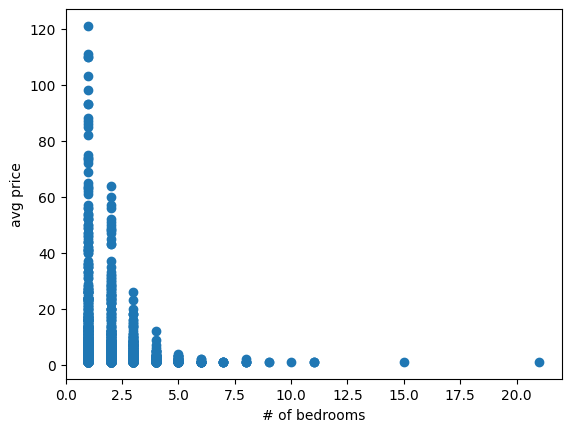

In [85]:
plt.scatter(df_01["bedrooms"],df_01["price"])
plt.xlabel("# of bedrooms")
plt.ylabel("avg price")
plt.show()

In [87]:
df_01.loc[]

SyntaxError: invalid syntax (557233800.py, line 1)

In [101]:
def stackedBarChart(cat1, cat2):
    xs = df_01[cat2]
    ys = df_01[cat1]

    cross = pd.crosstab(xs, ys)
    cross = cross/cross.sum()
    names1 = cross.columns
    names2 = cross.index
    
    fig, ax = plt.subplots()

    hs = np.zeros(len(names1))
    for x in names2:
        ys = cross.loc[x]
        ax.barh(names1, ys, left=hs)
        hs = hs + ys

    plt.figure(figsize = (5,28))
    #ax.legend(names2,loc='lower left')

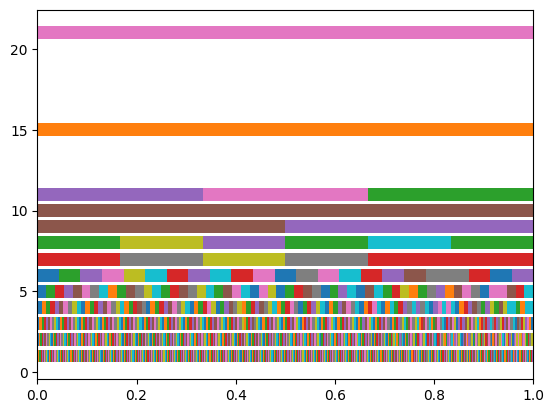

<Figure size 500x2800 with 0 Axes>

In [104]:
stackedBarChart("bedrooms","number_of_reviews")

In [20]:
roma_cleaned.groupby(["host_response_time","bedrooms"])["price"].describe()

count          mean          std      min  \
host_response_time bedrooms                                                
a few days or more 1.0         351.0    392.774929  1355.913562     17.0   
                   2.0          99.0    171.616162   189.702921     33.0   
                   3.0          34.0    178.323529   127.613223     48.0   
                   4.0          12.0    426.333333   673.409552     66.0   
                   5.0           4.0   1610.250000  2262.687248    400.0   
                   6.0           2.0   1295.000000  1704.127343     90.0   
within a day       1.0        1023.0    122.262952   368.462440     10.0   
                   2.0         324.0    126.777778    85.590283     14.0   
                   3.0         111.0    204.576577   160.670049     14.0   
                   4.0          27.0    610.851852  1195.533409     65.0   
                   5.0          13.0   1117.384615  1649.720104     96.0   
                   6.0           7.0   1191.428571   845.486617    350.0   
                   7.0           2.0   1060.000000   458.205194    736.0   
                   8.0           3.0    951.666667   351.717690    727.0   
                   9.0           2.0     91.000000    62.225397     47.0   
                   10.0          1.0    770.000000          NaN    770.0   
                   11.0          1.0    694.000000          NaN    694.0   
                   21.0          1.0   2200.000000          NaN   2200.0   
within a few hours 1.0        1752.0    110.885274   322.122056     15.0   
                   2.0         566.0    172.712014   342.736696     20.0   
                   3.0         157.0    238.993631   305.368031     11.0   
                   4.0          55.0    400.163636   378.736876     12.0   
                   5.0          22.0    508.681818   641.542070     35.0   
                   6.0          16.0    522.875000   318.249561     20.0   
                   8.0           1.0    640.000000          NaN    640.0   
                   10.0          1.0    800.000000          NaN    800.0   
                   15.0          1.0   1500.000000          NaN   1500.0   
within an hour     1.0       10603.0    131.156182   359.813154     10.0   
                   2.0        3692.0    182.691766   195.760703     15.0   
                   3.0        1212.0    290.086634   441.995172     13.0   
                   4.0         314.0    423.917197   735.687907     15.0   
                   5.0         104.0    560.663462   535.562505     15.0   
                   6.0          32.0    710.343750   428.375597     80.0   
                   7.0          12.0    915.333333   573.030752     82.0   
                   8.0           7.0    577.571429   215.803813    381.0   
                   9.0           3.0   1522.666667  1263.820135    200.0   
                   10.0          4.0   1100.000000   905.538514    100.0   
                   11.0          3.0    886.000000   786.096050    347.0   
                   12.0          1.0    186.000000          NaN    186.0   
                   16.0          1.0  16100.000000          NaN  16100.0   

                                  25%      50%       75%      max  
host_response_time bedrooms                                        
a few days or more 1.0          63.50    100.0    197.00  10000.0  
                   2.0          70.00     93.0    214.50   1000.0  
                   3.0          91.50    135.0    203.00    500.0  
                   4.0         145.00    230.0    285.00   2500.0  
                   5.0         400.00    520.5   1730.75   5000.0  
                   6.0         692.50   1295.0   1897.50   2500.0  
within a day       1.0          50.00     75.0    119.50   9999.0  
                   2.0          71.50    100.0    150.00    602.0  
                   3.0          94.00    168.0    257.50   1003.0  
                   4.0         157.50    301.0    475.00   6380.0  
                   5.0